In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

DATA_PATH = 'dataset'


def load_csv(path = DATA_PATH):
    csv_path = os.path.join(path, 'drugsComTrain_raw.tsv')
    return pd.read_csv(csv_path,delimiter='\t',encoding='utf-8')

In [2]:
df = load_csv()

In [3]:
##### Prints dataframe  head
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
##### Prints dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
##### Encondes the dataframe in order to replace strings with floats 
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['condition'] = encode.fit_transform(df['condition'].astype(str))
df['review'] = encode.fit_transform(df['review'].astype(str))
df['date'] = encode.fit_transform(df['date'].astype(str))
#df['drugName'] = encode.fit_transform(df['drugName'].astype(str))
#df = df.drop(['Unnamed: 0'], axis=1)
df = df.groupby("drugName").filter(lambda x: len(x) > 1800)
print(df.drugName.value_counts())

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Name: drugName, dtype: int64


LinAlgError: singular matrix

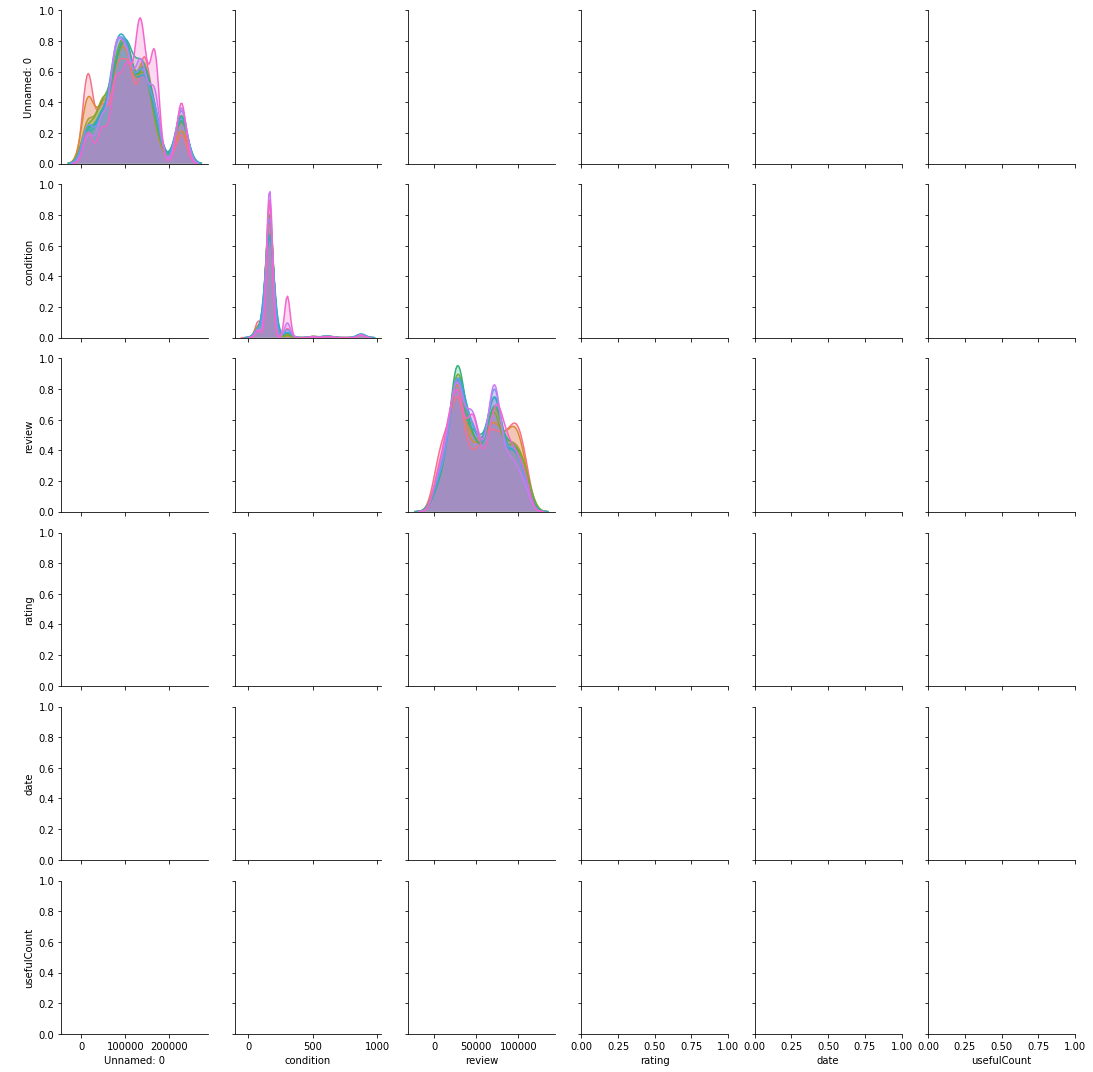

In [6]:
### Show us some graphs might be useful later to explain results (???? maybe)
tmp = df.drop('drugName', axis=1)
g = sns.pairplot(tmp, hue='rating', markers='+')
plt.show()

In [ ]:
g = sns.violinplot(y='drugName', x='condition', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='drugName', x='review', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='drugName', x='rating', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='drugName', x='usefulCount', data=df, inner='quartile')
plt.show()

In [ ]:
########## Modeling with scikit-learn ####
X = df.drop(['drugName'], axis=1)
y = df['drugName']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

In [ ]:
# experimenting with different n values
# This initializes knn with diferente values predicts trains the model, predicts and analizes the results 
start = time.time()
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

end = time.time()
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

timeSpent = end - start

print('Time spent: {} seconds'.format(timeSpent))

In [58]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[632, 3, 238, 232,192]])

array(['Etonogestrel'], dtype=object)

In [38]:
############ This is responsible to initialize and tain the neural network
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')
nn = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(100,100,100,100,100,100), alpha=1e-5,max_iter=500, random_state=1,verbose=True)
x_train, x_test, y_train, y_test = train_test_split(X_normalized,y, test_size= 0.25, random_state=1)
nn.fit(x_train, y_train)

Iteration 1, loss = 1.75869874
Iteration 2, loss = 1.75295950
Iteration 3, loss = 1.75090362
Iteration 4, loss = 1.74987296
Iteration 5, loss = 1.74847643
Iteration 6, loss = 1.74809975
Iteration 7, loss = 1.74733075
Iteration 8, loss = 1.74830613
Iteration 9, loss = 1.74685561
Iteration 10, loss = 1.74705520
Iteration 11, loss = 1.74712249
Iteration 12, loss = 1.74702070
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [39]:
######### Metric analise from the neural network train
from sklearn.metrics import accuracy_score
y_pred = nn.predict(x_test)
accuracy_score(y_test, y_pred)

0.2411897025743564

In [40]:
######## This is responsible to initialize and tain the support vector machine
from sklearn.svm import SVR
y = encode.fit_transform(df['drugName'].astype(str))
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)
svr_reg = SVR(gamma=0.001, C=1.0, epsilon=0.2,verbose=True)
log = svr_reg.fit(x_train, y_train)
print(log)
y_pred = svr_reg.predict(x_test)

[LibSVM]SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)


In [41]:
#### Returns the mean accuracy on the given test data and labels.
####### In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
svr_reg.score(x_test, y_pred)

1.0